# Exam 02 - ConvNets and RNNs

**Due: Friday 04/11/2018 by 5 p.m.**


**Please fill these in before submitting, just in case I accidentally mix up file names while grading**:

Name: Joe Student

CWID-5: (Last 5 digits of cwid)

In [1]:
# import python scientific libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import needed keras objects into current namespace
import keras
from keras import layers
from keras import models
from keras import optimizers

# note: you may need to import additional keras or Python libraries, these are just to get you started

Using TensorFlow backend.


In [2]:
# set plotting visual style and parameters for all plotted figures
%matplotlib inline
sns.set_style('darkgrid') # use seaborn style to improve visual presentation
sns.set_context('notebook')
plt.rcParams['figure.figsize'] = (12.0 , 8.0)

In [3]:
# check which devices tensorflow has recognized and is using
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7540620995294743879
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 174129152
locality {
  bus_id: 1
}
incarnation: 16940441137800118925
physical_device_desc: "device: 0, name: Quadro M2200, pci bus id: 0000:01:00.0, compute capability: 5.2"
]


## Problem 1: ConvNets

In this problem you will create and train a small Convolutional Network (convnet) on the CIFAR10 small
images dataset.  The [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) is a small dataset
of images, like the full ImageNet dataset, but with only 10 classes.  Images in this dataset are only
32x32 pixels, but are 3 color channel (RGB) images.  The CIFAR10 dataset is one of the preloaded/available
datasets provided by the Keras library.  In the next cell, we will load this dataset from keras
for you to get started with:

In [4]:
from keras.datasets import cifar10

In [5]:
(x_train, y_train), (x_val, y_val) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

print(x_train.shape[0], 'training samples available')
print(x_val.shape[0], 'test samples available')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 training samples available
10000 test samples available


This will download the image dataset for you, and then load them into mostly suitable NumPy arrays that can be
used for training.  You should see from the shape of the `x_train` training data that images are indeed 32x32 with 3 
color channels, and we have 50000 images for training, and 10000 for validation.  Also you should note that
`y_train` is a simple integer value in the range from 0 to 9, representing the 10 categories of images:



In [6]:
print('Category labels in training data:', np.unique(y_train))

Category labels in training data: [0 1 2 3 4 5 6 7 8 9]


The `y_train` array contains the correct labels.  You should also note that this is a multiclass
classification problem, and as we noted before, there are 10 categories of pictures in the CIFAR10 small images
dataset (things like cars, trucks, birds, horses, etc.).

Lets just display the first training image, so you have an idea of what types of images are in this dataset.

Corresponding y category label: [7]


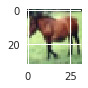

In [7]:
img_no = 7
img = x_train[img_no,:,:,:]
plt.figure(figsize=(1,1))
plt.imshow(img)
print('Corresponding y category label:', y_train[img_no])

** Task 1.1: Preprocessing and Normalization **

The image data has been loaded as unsigned integer pixel values.  We don't need to do much
preprocessing, but to make training easier and more reliable, we should treat the values as floating
point numbers, and normalize the pixel value ranges from 0-255 as they now are to 0.0 to 1.0 floating
point values.  In the next cell perform the following steps

1. Change the type of the `x_train` and `x_val` arrays to be `float32` types (they are currently `int`).
2. Normalize `x_train` and `x_val` so that the image pixel values range from 0.0 to 1.0

Both of these steps can be done using simple 1 line NumPy library functions or vectorized operations.

In [ ]:
# cast values to floating point types, so we can normalize


# normalize the original unsigned int pixels (range 0-255) to floating point values in range 0.0 - 1.0


In addition, you should note that currently the label/class is encoded as an integer ranging from 0 to 9.
We need to change this to a one-hot encoding, so that the `y_train` and `y_val` vectors are of shape
(50000,10) and (10000,10) respectively, and each category is encoded as a one-hot vector of size 10.

There are many ways you can preprocess the `y` labels to one-hot encode them.  The easiest is probably the
method our textbook shows in order to encode the MNIST images, using the `keras.utils.to_categorically`
utility method.  In the next cell, perform this preprocessing to convert `y_train` and `y_val` into
one-hot encoded vectors:

In [ ]:
# one-hot encode y_train and y_val.
# result should be one-hot encoded vectors of shape (50000,10) and (10000,10) respectively 


**Task 1.2: Build a ConvNet**

Once the date has been preprocessed and normalized correctly, you are ready to build your convolutional network
for training.  You will be training a network for a multi-class classification problem here.  In the next cell
build the following network.  You can and probably should use the simple Keras `Sequential()` API for constructing
this network.  This will be similar to the model built in our textbook for the dogs vs. cats example in section
5.2.3, but keep in mind we are doing multi-class classification rather than binary classification now.

Build a network with 2 initial `Conv2D` layers that use 3x3 sized convolutions.  Both of these first 2 layers
should learn/output 32 feature maps.  Follow the 2 `Conv2D` layers by a `MaxPooling2D` layer with a 2x2 pool.
And then create a `Dropout` layer that use 0.25 (25%) dropout ratio.  The convolutional layers should use
standard `relu` output activation.

Next build another set of `Conv2D`, `Conv2D`, `MaxPooling2D`, `Dropout` layers.  The only difference with these
next set of 4 layers is that you should increase the number of feature maps in the convolutions to represent
64 features in both convolutions.  But otherwise use `relu` activation, 3x3 convolutions and 2x2 pools and 
a 0.25 dropout rate.

At the top of your network you will add two dense layers.  Don't forget to flatten the results from the
last `Dropout` layer before feeding it into the first `Dense` layer.  Create a `Dense` layer with 512
hidden units and using `relu` activation, followed by a `Dropout` layer with 0.5 (50%) dropout.
Then finally create a final `Dense` layer with 10 outputs that uses `softmax` output activation
in order to perform multi-class classification using the network.

Build the described network in the next cell:

In [ ]:
# Build the described convolutional network here.  Probably best to stick with a Sequential() model.


**Task 1.3: Fit model without any data augmentation**

Next you need to create an optimizer, and compile and fit (train) your model.  Use an RMSprop
optimizer with a learning rate of 0.0001.  Also use a learning rate decay of 1e-6 in the optimizer.

Then compile your model.  Don't forget to use the correct type of loss function in order to train for
a multi-class classification.  Also you should ask that metrics for `accuracy` are calculated, so that
you can plot both loss and accuracy results after training.

Finally fit your model using the training data and validate with the validation data.  Use a batch size
of 32 images during training, and train for a fixed 25 epochs.

In [ ]:
# create optimizer and compile model in this cell


In [ ]:
# fit model with training data and validate with validation data for 50 epochs of training


You should find that you can get better than 70% accuracy after 25 epochs.  Plot the loss and accuracy curves
in the next cell.

Answer this question in this markdown cell.

**Question:** Looking at the loss and accuracy curves for the training and validation data, does it appear for your
training that the model is overfitting or underfitting after 25 generations.  Explain your reasoning in a sentence or two.

**Answer:** 

In [ ]:
# plot loss and accuracy curves for your model training here


**Task 1.4: Train with data augmentation using an ImageDataGenerator**

In section 5.25 of our textbook, we covered using an `ImageDataGenerator` in order to use data augmentation
for the training.  Data augmentation techniques for image processing classification can greatly increase the
performance of deep neural networks.

In the next cell create an `ImageDataGenerator`.  At a minimum, perform width shifting of 0.1 (10%) as well
as height shifting of up to 0.1 (10%).  Also perform horizontal flipping (do not do vertical flipping).
You can add others, like some rotation and shearing if you like, but they are probably not too useful for these
small images.  We already rescaled the data we will be augmenting, so there is no need to rescale it
using the data generator.

In the textbook, the data generator created using an `ImageDataGenerator` flowed and augmented images from
on disk files.  But you already have all of the image data in memory in NumpyArrays that you want to augment.
You can simply use the `flow()` method from the created `ImageDataGenerator` in order to
do a `fit_generator` as we did in the textbook.

In the next cells, create the described `ImageDataGenerator`.  Then fit the model using `fit_generator`.  Fit
the model for 25 epochs, using the same optimizer and validation data as before.  HINT: you do not need a data
generator for the validation data.  Unlike the textbook example, you do not need to flow the validation data from
files on disk.  So you can simply directly use your validation data when fitting here.

In [ ]:
# create data generator using ImageDataGenerator here


In [ ]:
# create your model from scratch again


In [ ]:
# and train your model again from scratch, using the augmented image data generator

Again plot the accuracy and loss in the next cell for this training run.

**Question:**  Did the data generator appear to increase or decreate the performance of the convolutional
network on this data?  Explain your reasoning in a sentence or two using your loss and accuracy curves.

**Answer:** 

In [ ]:
# plot your accuracy and loss curves here

## Problem 2: Recurrent Neural Networks (RNNs)

In this problem you will construct an LSTM recurrent network in order to perform a prediction task.  You will
be using the Penn Tree Bank (PTB) text data set for this problem.  You need to first download
the [PTB dataset from here](http://www.fit.vutbr.cz/~imikolov/rnnlm/simple-examples.tgz), and extract the zip file to a subdirectory.  The following cell assumes you put it in the `../data` subdirectory.  After extracting, run
the following cells in order to read in the textual database you will be using.

In [8]:
# some utility functions used to load the data
import os
import os.path
import tensorflow as tf
import collections

def read_words(filename):
    with tf.gfile.GFile(filename, "r") as f:
        #return f.read().decode("utf-8").replace("\n", "<eos>").split() # Python 2.X needed to decode
        return f.read().replace("\n", "<eos>").split() # Python 3.x should already be decoded


def build_vocab(filename):
    data = read_words(filename)

    counter = collections.Counter(data)
    count_pairs = sorted(counter.items(), key=lambda x: (-x[1], x[0]))

    words, _ = list(zip(*count_pairs))
    word_to_id = dict(zip(words, range(len(words))))

    return word_to_id


def file_to_word_ids(filename, word_to_id):
    data = read_words(filename)
    return [word_to_id[word] for word in data if word in word_to_id]



In [9]:
data_directory = '../data'
data_path = os.path.join(data_directory, 'simple-examples/simple-examples/data')

def load_data(data_path):
    # get the data paths
    train_path = os.path.join(data_path, "ptb.train.txt")
    valid_path = os.path.join(data_path, "ptb.valid.txt")
    test_path = os.path.join(data_path, "ptb.test.txt")

    # build the complete vocabulary, then convert text data to list of integers
    word_to_id = build_vocab(train_path)
    train_data = file_to_word_ids(train_path, word_to_id)
    valid_data = file_to_word_ids(valid_path, word_to_id)
    test_data = file_to_word_ids(test_path, word_to_id)
    vocabulary = len(word_to_id)
    reversed_dictionary = dict(zip(word_to_id.values(), word_to_id.keys()))

    return train_data, valid_data, test_data, vocabulary, reversed_dictionary

train_data, valid_data, test_data, vocabulary, reversed_dictionary = load_data(data_path)

In [10]:
print('train_data length:', len(train_data))
print('valid_data length:', len(valid_data))
print('test_data  length:', len(test_data))

print('vocabulary size:  ', vocabulary)

print('10 items of train_data:')
print(train_data[100:110])

print('Lookup the 10 words using the reverse dictionary:')
print(' '.join([reversed_dictionary[x] for x in train_data[100:110]]))

train_data length: 929589
valid_data length: 73760
test_data  length: 82430
vocabulary size:   10000
10 items of train_data:
[431, 4115, 5, 14, 45, 55, 3, 72, 195, 1244]
Lookup the 10 words using the reverse dictionary:
workers exposed to it more than N years ago researchers


The data is comprised of a list of integers.  The integers, as we did in chapter 6, are simply mappings
where each word in the 10000 sized vocabulary is assigned a unique integer.  You can read about the
Penn Tree Bank corpus [here](https://catalog.ldc.upenn.edu/ldc99t42). Basically the corpus is a collection
of Wall Street Journal financial articles.  In any case, the encoding is basically the same as the movie review
data set encoding we used in chapter 6.



**Task 2.1: Create data generator for LSTM model**

Also in a similar manner as we did in chapter 6,
we will create a data generator object by hand for
the training of your RNN in this problem.  I will
give you most of the generator here.  This generator
simply iterates through the list of encoded words,
and returns appropriate tensors for training a
RNN.  The generator is serving two purposes.  It
yields data in appropriate batch sizes for training.  But
more importantly, it takes the simple list of integer word
sequences, and yields tensors of training data and
labels.

In the following class, the generator object accepts a number
of parameters in addition to the data.  

- num_steps: This is simply the number of words of input given
  to the RNN.  For example if num_steps=5, then we give 5 words
  as input and train/learn to predict the 6th word after that.
- batch_size: Simply the number of training examples to yield
  with each call to the generator.
- vocabulary: A scalar integer, this is the size of the vocabulary.  We encode the target output as a one-hot encoded vector of this size.
- skip_step: Each example we yield will skip this number of words.  So for example, if skip_step=5 then the first sample will
  start at word 0 of the data, and then next at word 5, then 10,
  etc.

In [11]:
# parameters used for this problem
num_steps = 5
batch_size = 32


In [12]:
# definition of a generator object, to use for training
class KerasBatchGenerator(object):
    
    def __init__(self, data, num_steps, batch_size, vocabulary, skip_step=5):
        self.data = data
        self.num_steps = num_steps
        self.batch_size = batch_size
        self.vocabulary = vocabulary
        # this will track the progress of the batches sequentially through the
        # data set - once the data reaches the end of the data set it will reset
        # back to zero
        self.current_idx = 0
        # skip_step is the number of words which will be skipped before the next
        # batch is skimmed from the data set
        self.skip_step = skip_step
        
    def generate(self):
        x = np.zeros((self.batch_size, self.num_steps))
        y = np.zeros((self.batch_size, self.num_steps, self.vocabulary))
        while True:
            for i in range(self.batch_size):
                if self.current_idx + self.num_steps >= len(self.data):
                    # reset the index back to the start of the data set
                    self.current_idx = 0
                x[i, :] = self.data[self.current_idx:self.current_idx + self.num_steps]
                temp_y = self.data[self.current_idx + 1:self.current_idx + self.num_steps + 1]
                # convert all of temp_y into a one hot representation
                y[i, :, :] = keras.utils.to_categorical(temp_y, num_classes=self.vocabulary)
                self.current_idx += self.skip_step
            yield x, y

In [13]:
# create generators for both training and validation data
train_data_generator = KerasBatchGenerator(train_data, num_steps, batch_size, vocabulary, skip_step=num_steps)
valid_data_generator = KerasBatchGenerator(valid_data, num_steps, batch_size, vocabulary, skip_step=num_steps)

**Task 2.1: Create LSTM network**

In this step, you will build and train a RNN using LSTM layers.
The task for this data is to predict the next work given a
sequence of words.  

Unfortunately this data set is somewhat complex, and takes
a large amount of computation to successfully train.  For this
exam problem, you will only need to get the network set up
so it can train successfully.  If you have access to a more
powerful system, you can attempt to train the network
sufficiently to perform well on the prediction.  But for this
task, you only need to get the network set up so that you can
successfully train it.

In the following cell, create a recurrent network using the
following specification:

Start the model with an Embedding layer.  The layer should
handle the vocabulary size input, and embed it into a 25
dimensional space.  

Next add two LSTM layers.  These layers should also use
25 features for the number of units.  These layers should
return the complete sequence, so make sure you specify that
return_sequences=True for these layers.

After the LSTM recurrent layers, add a layer of dropout using
0.5 (50%) drop out rate.

Finally we need a dense layer using softmax activation that
predicts the next word.  We are using one-hot encoded
labels of size `vocabulary`, so your softmax dense output
needs to output `vocabulary` size outputs.

In addition, you need to wrap this final Dense layer in
a `TimeDistributed` layer.  We did not discuss these
types of layer wrappers in class, you can read more
about it [here](https://keras.io/layers/wrappers/)
in the Keras documentation.  Wrap your dense layer
in one of these TimeDistributed layers.

Buld the described network in the following cells:

In [ ]:
# create your RNN network model here based on the description for this problem


**Task 2.3: Compile and fit the keras LSTM model**

Use the adam optimizer and compile your model.  You need to
use the appropriate loss function.  Instead of using `accuracy`,
use `categorical_accuracy` for your training metrics in this
training session.

Then, using the generators you were given previously,
use `fit_generator` to train your network.  As mentioned,
training will be very slow here.  To test you have it working,
you can train simply for an epoch or two.  Also, when using
a generator, you need to specify the number of samples to pull
each epoch.  The correct number to pull on each epoch is
the lenth of the data divided by the `batch_size * num_steps`
you used.  However, again to test, you can make this much
smaller just to see that your fitting is working over several
epochs.

In [ ]:
# compile your model use, use the adam optimizer


In [ ]:
# fit your model here using the train_data_generator and valid_data_generator defined previously for
# the training

**Task 2.4: Results**

As mentioned, the PTB data set is a serious text data set,
not a toy problem.  Therefore, the network you created, though
capable of making some headway on the problem, does need a lot
more computation to increase performance.  Likewise, to really
get accuracy increased, we will probably also need a more powerful
model.

But this model is sufficient to show that the data set can
be learned.  Train the previous cell as much as you
have time for, then in the next cell, plot the loss
and categorical_accuracy curves.

In [ ]:
# display categorical_accuracy and loss curves here

**Task 2.5: Generator**

This task is a bit more open ended.  But you have a trained
predictor.  Create a text generator similar to the one we
created in our textbook for the Nietzche data set.  Run
it in the next cell.  Of course depending on how much training 
you could do, you results may or may not be so good.  Did
you get anything that looked interesting from your
generator?

In [ ]:
# create a text generator, based on work from chapter 9 and using your RNN predictor